In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


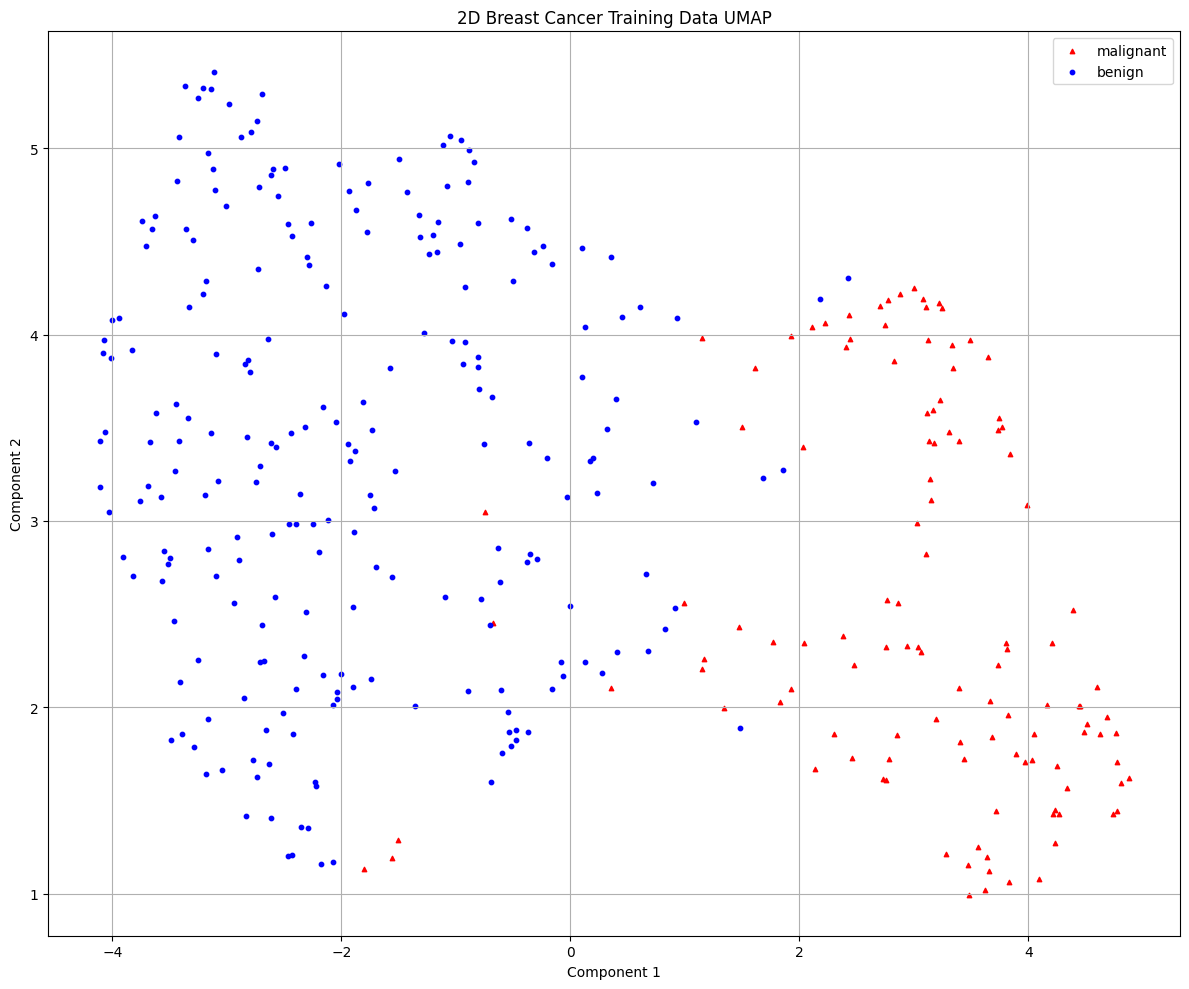

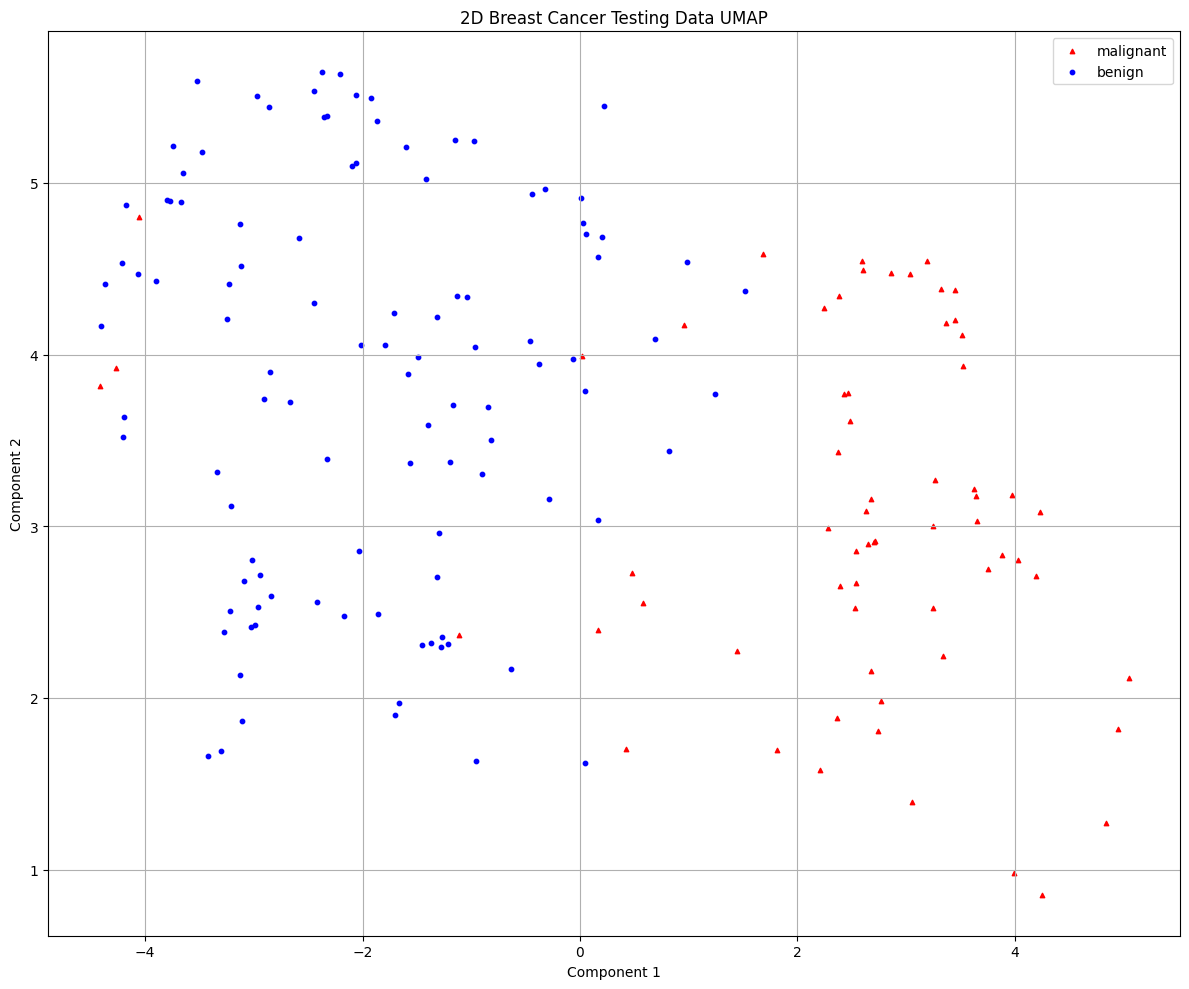

[I 2025-04-27 10:21:39,539] A new study created in memory with name: no-name-591f4a74-7a92-4c3c-a6e6-9f9cb140a20c
[I 2025-04-27 10:21:42,649] Trial 0 finished with value: 0.9630985915492959 and parameters: {'n_estimators': 677, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9630985915492959.
[I 2025-04-27 10:21:44,681] Trial 1 finished with value: 0.9630181086519116 and parameters: {'n_estimators': 445, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.9630985915492959.
[I 2025-04-27 10:21:47,386] Trial 2 finished with value: 0.9630985915492957 and parameters: {'n_estimators': 612, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9630985915492959.
[I 2025-04-27 10:21:49,651] Trial 3 finished with value: 0.9573843058350102 and parameters: {'n_estimators': 498, 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 0 with 

Best trial:
Accuracy: 0.9632595573440644
Best hyperparameters:  {'n_estimators': 450, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 14}


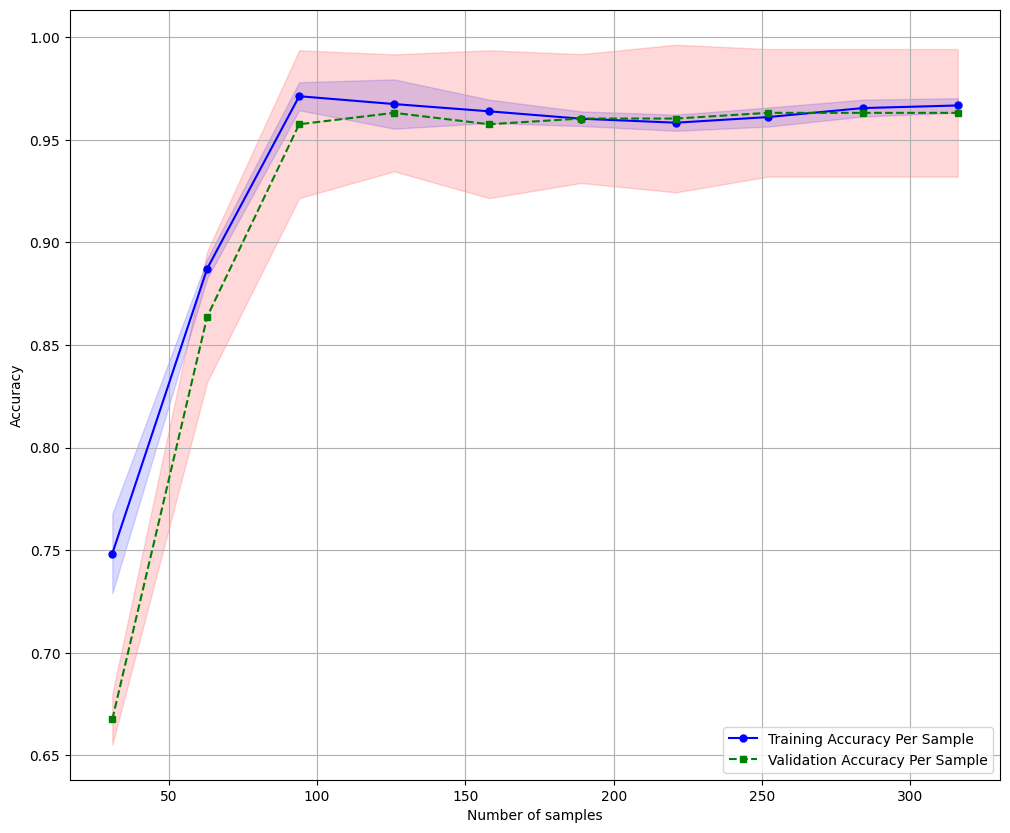

Confusion Matrix
[[ 54  10]
 [  2 105]]
Accuracy: 0.9298, Precision: 0.9130, Recall: 0.9813, F1: 0.9459, AUC: 0.9585


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)